In [1]:
import math
import numpy as np
from numpy import exp, arange
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from scipy.optimize import dual_annealing
from mealpy.physics_based.SA import OriginalSA

In [2]:
# define objective function/s
def objective_function(solution):
    # Bohachevsky function
    return solution[0]**2 +2*(solution[1]**2)-0.3*np.cos(3*np.pi*solution[0])-0.4*np.cos(4*np.pi*solution[1])+0.7

# define boundary constraints of the decision variables
bounds = np.asarray([[-100, 100], [-100, 100]])

In [3]:
# perform dual annealing search
res_dual = dual_annealing(objective_function, bounds=bounds, maxiter = 100) 

In [4]:
# perform simulated annealing search using MEALPY

# define the problem
problem = {
    "fit_func": objective_function,
    "lb": [bounds[0][0], bounds[1][0]],
    "ub": [bounds[0][1], bounds[1][1]],
    "minmax": "min",
    "obj_weights": [1, 1]
}

# define algorithm parameters
epoch = 100
pop_size = 10
max_sub_iter = 2
t0 = 1000
t1 = 1
move_count = 5
mutation_rate = 0.1
mutation_step_size = 0.1
mutation_step_size_damp = 0.99

#define a SA solver
model = OriginalSA(epoch, pop_size, max_sub_iter, t0, t1, move_count, mutation_rate, mutation_step_size, mutation_step_size_damp)

#solve the problem using defined solver
mealpy_solution, mealpy_value = model.solve(problem)

2022/10/20 01:05:24 PM, INFO, mealpy.physics_based.SA.OriginalSA: Solving single objective optimization problem.
2022/10/20 01:05:24 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 1, Current best: 6.750672660234583, Global best: 6.750672660234583, Runtime: 0.02401 seconds
2022/10/20 01:05:24 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 2, Current best: 2.753526954475883, Global best: 2.753526954475883, Runtime: 0.02189 seconds
2022/10/20 01:05:24 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 3, Current best: 0.7267992728378828, Global best: 0.7267992728378828, Runtime: 0.02352 seconds
2022/10/20 01:05:24 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 4, Current best: 2.338694681434775, Global best: 0.7267992728378828, Runtime: 0.02427 seconds
2022/10/20 01:05:24 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 5, Current best: 1.186312658249233, Global best: 0.7267992728378828, Runtime: 0.03

In [5]:
# print Dual Annealing Solution
print('Dual Annealing Solution: f(%s) = %.5f' % (res_dual['x'], res_dual['fun']))
# print MEALPY SA Solution
print('MEALPY SA Solution: f(%s) = %.5f' % (mealpy_solution, mealpy_value))

Dual Annealing Solution: f([6.18611747e-01 1.30860497e-08]) = 0.41293
MEALPY SA Solution: f([ 0.0085986  -0.01843213]) = 0.01242


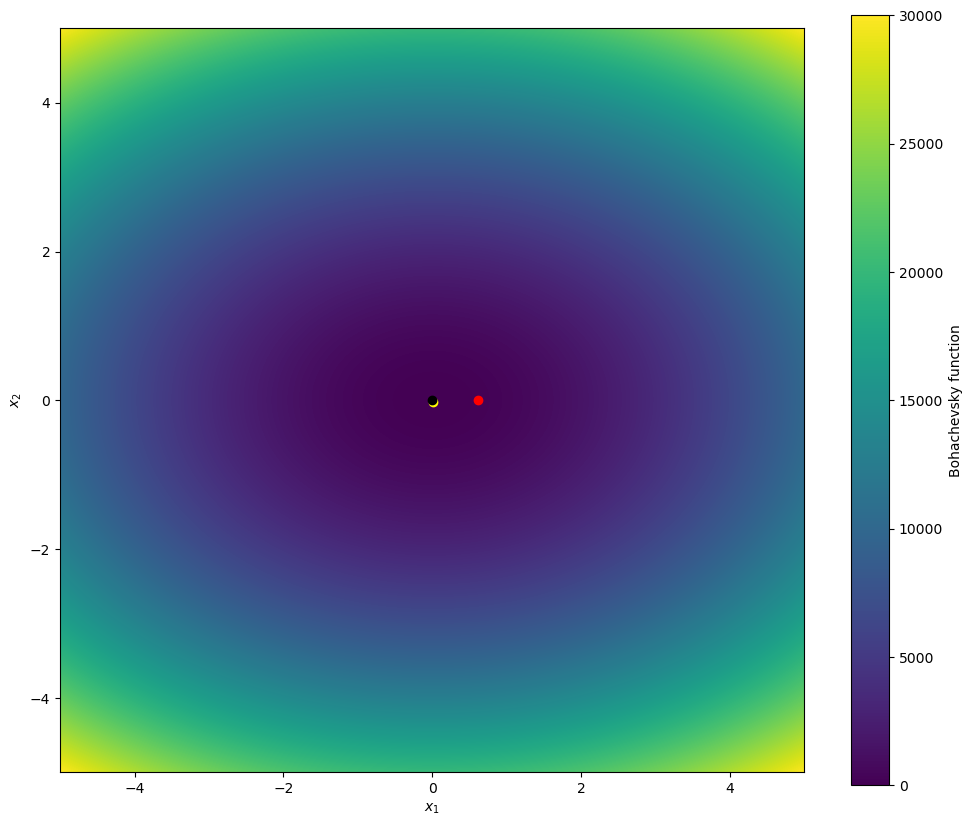

In [6]:
# plottinng the objective functions and the obtained solutions
x = arange(bounds[0][0],bounds[0][1],0.1)
y = arange(bounds[0][0],bounds[0][1],0.1)
X,Y = meshgrid(x, y) 
F = objective_function([X,Y])

plt.figure(figsize=(12, 10))
plt.imshow(F, extent=[-5, 5,-5, 5], origin='lower', cmap='viridis')
plt.colorbar(label="Bohachevsky function")
plt.scatter(res_dual['x'][0],res_dual['x'][1], c='red')
plt.scatter(mealpy_solution[0],mealpy_solution[1], c='yellow')
plt.scatter(0,0, c='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()